# Regression

In this project, your goal is to build regression models of housing prices. The models should learn from data and be able to predict the median house price in a district (which is a population of 600 to 3000 people), given some predictor variables. 


# Data Import

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.api as sm

import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns  

# seaborn settings
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)

df = pd.read_csv("ready_data.csv")
df

,housing_median_age,median_income,median_house_value,priceCat,person_per_household,share_bedrooms,rooms_per_household,sm_PpH,sm_RpH,proximity
0,41.0,8.3252,452.6,above,2.555556,0.146591,6.984127,0.938270,1.943640,COAST
1,21.0,8.3014,358.5,above,2.109842,0.155797,6.238137,0.746613,1.830682,COAST
2,52.0,7.2574,352.1,above,2.802260,0.129516,8.288136,1.030426,2.114825,COAST
3,52.0,5.6431,341.3,above,2.547945,0.184458,5.817352,0.935287,1.760845,COAST
4,52.0,3.8462,342.2,above,2.181467,0.172096,6.281853,0.779998,1.837665,COAST
...,...,...,...,...,...,...,...,...,...,...
19369,25.0,1.5603,78.1,below,2.560606,0.224625,5.045455,0.940244,1.618488,INLAND
19370,18.0,2.5568,77.1,below,3.122807,0.215208,6.114035,1.138732,1.810587,INLAND
19371,17.0,1.7000,92.3,below,2.325635,0.215173,5.205543,0.843993,1.649724,INLAND
19372,18.0,1.8672,84.7,below,2.123209,0.219892,5.329513,0.752929,1.673260,INLAND


In [2]:
datatypes_toChange = {"proximity": "category"}
df = df.astype(datatypes_toChange)
df = df.drop(["priceCat"], axis=1)

# Vorgehensweise

In den nachfolgenden Punkten wird die Lineare Regression jeweils einmal mit **SK Learn** und **Statsmodels** durchgeführt.</br>
Dabei sind unterschiedliche Vorgehensweisen bzgl. Einlesen der Daten zu beachten.

Vorarbeit wurde bereits in Data.ipynb erbracht.

Ferner wird zum Statsmodel-Anteil die Regression Diagnostic durchgeführt.

# Modellierung in Statsmodels

In [3]:
%matplotlib inline

import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from statsmodels.tools.eval_measures import mse, rmse
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from statsmodels.compat import lzip

sns.set_theme(style="ticks", color_codes=True)

In [4]:
dummies = pd.get_dummies(df[["proximity"]], drop_first = True)

In [5]:
df_stats = pd.concat([df, dummies[["proximity_INLAND"]]], axis=1)
df_stats = df_stats.drop(columns=["proximity", "person_per_household", "rooms_per_household"], axis=1)

In [6]:
train_dataset = df_stats.sample(frac=0.8, random_state=0)
test_dataset = df_stats.drop(train_dataset.index)

In [7]:
df_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19374 entries, 0 to 19373
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   housing_median_age  19374 non-null  float64
 1   median_income       19374 non-null  float64
 2   median_house_value  19374 non-null  float64
 3   share_bedrooms      19374 non-null  float64
 4   sm_PpH              19374 non-null  float64
 5   sm_RpH              19374 non-null  float64
 6   proximity_INLAND    19374 non-null  uint8  
dtypes: float64(6), uint8(1)
memory usage: 927.2 KB


In [8]:
# Fit Model
lm = smf.ols(formula='median_house_value ~ housing_median_age + median_income + sm_PpH + sm_RpH + share_bedrooms + proximity_INLAND' , data=train_dataset).fit()
# Full summary
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     median_house_value   R-squared:                       0.634
Model:                            OLS   Adj. R-squared:                  0.634
Method:                 Least Squares   F-statistic:                     4466.
Date:                Sun, 23 Jan 2022   Prob (F-statistic):               0.00
Time:                        22:03:58   Log-Likelihood:                -85118.
No. Observations:               15499   AIC:                         1.703e+05
Df Residuals:                   15492   BIC:                         1.703e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             41.5270      8.436      4.922      0.000      24.991      58.063
housing_median_age     0.8781      0.041     21.625      0.000       0.799       0.958
median_income         42.3322      0.443     95.560      0.000      41.464      43.201
sm_PpH               -90.7066      1.956    -46.362      0.000     -94.541     -86.872
sm_RpH                14.4552      2.969      4.869      0.000       8.636      20.275
share_bedrooms       289.3892     14.873     19.458      0.000     260.237     318.541
proximity_INLAND     -63.2952      1.186    -53.391      0.000     -65.619     -60.972
==============================================================================
Omnibus:                     2279.366   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7936.757
Skew:                           0.731   Prob(JB):                         0.00
Kurtosis:                       6.186   Cond. No.                     1.12e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.12e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Nicht-Normalverteilte Residuen

Obwohl Omnibus und Jarque-Bera die Null-Hypothese der Normalverteilten Residuen verwerfen, können wir wegen der Anzahl von 15T Beobachtungen (sehr großes n) von Normalverteilung ausgehen.

## Correlation of Error Terms

Durbin Watson ist 2. Demnach liegt keine Autokorrelation der Fehlerterme vor.

## Mulitkolliniarität

Eine hohe Condition Number ist ein Hinweis auf Mulitkolliniarität. Daher wird nachfolgen der Variance Inflation Factor betrachtet.

Im besten Fall sind die Werte = 1. Werte größer 5 sind sehr problematisch. </br>
Im vorliegenden Modell sind hohe Werte für Rooms per Household und Share_Bedroom enthalten. Daher wird das Feature Share Bedroom entfernt.
Das Summary zum neuen Modell fällt geringfühgig in R2, jedoch wir die Condition Number kleiner. Beim neuen VIF nimmt das Feature Rooms per Household deutlich ab.

In [9]:
# choose features and add constant
features = add_constant(df[["housing_median_age", "median_income", "sm_PpH", "sm_RpH", "share_bedrooms"]])
# create empty DataFrame
vif = pd.DataFrame()
# calculate vif
vif["VIF Factor"] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]
# add feature names
vif["Feature"] = features.columns

vif.round(2)

,VIF Factor,Feature
0,316.14,const
1,1.08,housing_median_age
2,1.71,median_income
3,1.02,sm_PpH
4,2.68,sm_RpH
5,3.11,share_bedrooms


In [10]:
# choose features and add constant
features = add_constant(df[["housing_median_age", "median_income", "sm_PpH", "sm_RpH"]])
# create empty DataFrame
vif = pd.DataFrame()
# calculate vif
vif["VIF Factor"] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]
# add feature names
vif["Feature"] = features.columns

vif.round(2)

,VIF Factor,Feature
0,73.25,const
1,1.07,housing_median_age
2,1.42,median_income
3,1.00,sm_PpH
4,1.45,sm_RpH


In [11]:
# Fit Model
lm = smf.ols(formula='median_house_value ~ housing_median_age + median_income + sm_PpH + sm_RpH + proximity_INLAND' , data=train_dataset).fit()
# Full summary
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     median_house_value   R-squared:                       0.625
Model:                            OLS   Adj. R-squared:                  0.625
Method:                 Least Squares   F-statistic:                     5158.
Date:                Sun, 23 Jan 2022   Prob (F-statistic):               0.00
Time:                        22:03:59   Log-Likelihood:                -85305.
No. Observations:               15499   AIC:                         1.706e+05
Df Residuals:                   15493   BIC:                         1.707e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            185.2889      4.122     44.953      0.000     177.210     193.368
housing_median_age     0.7778      0.041     19.080      0.000       0.698       0.858
median_income         38.6419      0.405     95.367      0.000      37.848      39.436
sm_PpH               -95.7115      1.963    -48.758      0.000     -99.559     -91.864
sm_RpH               -21.4593      2.354     -9.117      0.000     -26.073     -16.846
proximity_INLAND     -66.7403      1.186    -56.254      0.000     -69.066     -64.415
==============================================================================
Omnibus:                     2366.126   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7045.631
Skew:                           0.806   Prob(JB):                         0.00
Kurtosis:                       5.883   Cond. No.                         301.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Influence und Outliers

Ausreißer und Punkte mit großen Einfluss auf die Regressionsgerade werden mittels Cook's Distance und Influence Plot identifiziert und aus dem Datensatz entfernt.

Dies verbessert den R2 von 62,5 auf 72,5.

KeyboardInterrupt: 

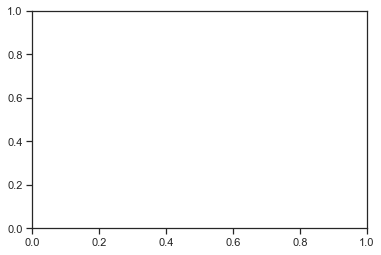

In [12]:
fig = sm.graphics.influence_plot(lm, criterion="cooks")
fig.tight_layout(pad=1.0)

In [13]:
# obtain Cook's distance 
lm_cooksd = lm.get_influence().cooks_distance[0]

# get length of df to obtain n
n = len(train_dataset["median_income"])

# calculate critical d
critical_d = 4/n
print('Critical Cooks distance:', critical_d)

# identification of potential outliers with leverage
out_d = lm_cooksd > critical_d

# output potential outliers with leverage
print(train_dataset.index[out_d], "\n", lm_cooksd[out_d])
dont_want = np.array(train_dataset.index[out_d])

Critical Cooks distance: 0.0002580811665268727
Int64Index([13667,  8780, 17298, 19308, 16953,  7893, 17178, 19278,  8298,
              390,
            ...
            17162,  2487,  6332, 10008,  9773,  5171, 11151, 14913, 13695,
             8185],
           dtype='int64', length=924) 
 [0.00027069 0.00051385 0.00056884 0.00063702 0.0003786  0.00153688
 0.00045435 0.00031262 0.0003456  0.00047778 0.00028509 0.0002717
 0.0004633  0.00036501 0.00161999 0.00040728 0.00439233 0.00081595
 0.00034619 0.000455   0.0014027  0.00135286 0.00028554 0.00078443
 0.00026739 0.00026843 0.00028671 0.00163723 0.00073892 0.00043956
 0.0002625  0.0012931  0.00031408 0.00168655 0.00027611 0.00072424
 0.00031134 0.00026534 0.00035736 0.00073711 0.00042623 0.00236697
 0.00112014 0.00035835 0.00120994 0.00088666 0.00033455 0.00090281
 0.00064843 0.00117344 0.00092746 0.00097496 0.00074999 0.00043042
 0.00041491 0.00032414 0.00030911 0.00175696 0.00037866 0.00038702
 0.000999   0.00026481 0.00027795 0.000

In [14]:
a = len(train_dataset)

for i in dont_want:
    train_dataset = train_dataset.drop(index=i)

print("Gelöschte Datensätze nach Cook's distance:", a - len(train_dataset))

Gelöschte Datensätze nach Cook's distance: 924


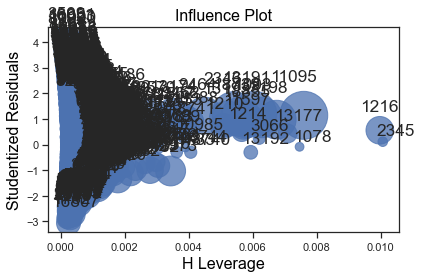

In [15]:
lm = smf.ols(formula='median_house_value ~ housing_median_age + median_income + sm_PpH + sm_RpH + proximity_INLAND' , data=train_dataset).fit()
fig = sm.graphics.influence_plot(lm, criterion="cooks")
fig.tight_layout(pad=1.0)

In [16]:
print("R2:",lm.rsquared)
print("R2_adj:",lm.rsquared_adj)

R2: 0.7245126582403816
R2_adj: 0.7244181125125486


## Nicht-Linearität und Heteroskedastizität

Der Fitted vs Regression Plot zeigt jedoch einen möglichen nicht-linearen Zusammenhang in der Varianz der Residuen.</br>
Dies wird mit dem **Breusch-Pagan Lagrange Multiplier test** überprüft. Homoskedastizität kann nicht angenommen werden, weil der p-value kleiner 0.05 ist und die Null-Hypothese nicht verworfen wird.


eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1


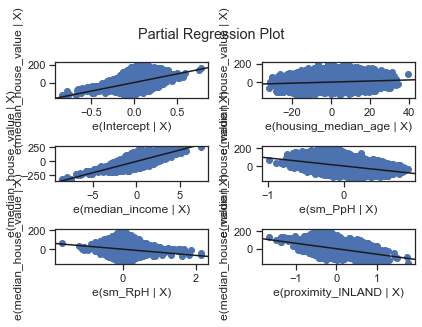

In [17]:
fig = sm.graphics.plot_partregress_grid(lm)
fig.tight_layout(pad=1.0)

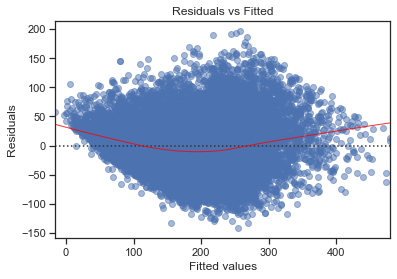

In [18]:
# fitted values
model_fitted_y = lm.fittedvalues

#  Plot
plot = sns.residplot(x=model_fitted_y, y='median_house_value', data=train_dataset, lowess=True, 
                     scatter_kws={'alpha': 0.5}, 
                     line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

# Titel and labels
plot.set_title('Residuals vs Fitted')
plot.set_xlabel('Fitted values')
plot.set_ylabel('Residuals');

In [19]:
name = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
test = sm.stats.het_breuschpagan(lm.resid, lm.model.exog)
lzip(name, test)

[('Lagrange multiplier statistic', 1099.4848025329363),
 ('p-value', 1.72860501759635e-235),
 ('f-value', 237.74072981066067),
 ('f p-value', 7.149384108949611e-245)]

## Validierung mit Testdaten

In [20]:
# Add the regression predictions (as "pred") to our DataFrame
train_dataset['y_pred'] = lm.predict()
# Predict with Test_Dataset
test_dataset['y_pred'] = lm.predict(test_dataset)

In [21]:
# MSE
print("MSE train dataset:",mse(train_dataset['median_house_value'], train_dataset['y_pred']))
print("RMSE train dataset:",rmse(train_dataset['median_house_value'], train_dataset['y_pred']))
print("MSE test dataset:",mse(test_dataset['median_house_value'], test_dataset['y_pred']))
print("RMSE test dataset:",rmse(test_dataset['median_house_value'], test_dataset['y_pred']))

MSE train dataset: 2168.635897340869
RMSE train dataset: 46.56861493904311
MSE test dataset: 3684.1823574384193
RMSE test dataset: 60.697465823858074


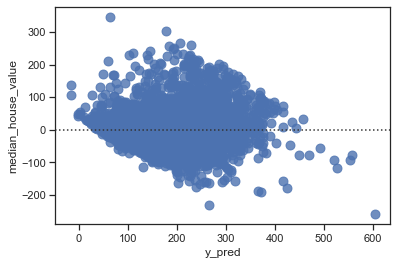

In [22]:
sns.residplot(x="y_pred", y="median_house_value", data=test_dataset, scatter_kws={"s": 80});

# Modellierung in SK Learn Pipeline

Nachfolgend die Regression mit der Pipeline von SKLearn mit dem Austausch von Parametern zum Darstellen der Pipeline-Funktionalität.</br>
Mit anpassen einer Liste von Predictor-Variablen können über die Pipeline zahlreiche Modelle ermittelt werden.

Zu beachten ist, dass die in Data.ipynb durchgeführten Log-Transformationen ebenfalls über die Pipeline erfolgen. D.h. getrennt für Trainings- und Testdaten.</br>
Dies hilft bei der Standardizierung, welche hier ebenfalls für alle nummerischen Variablen vorgenommen wird.

Die Erkenntnisse aus Regression-Diagnostics könnten an dieser Stelle berücksichtigt werden. Dies wird ausgelassen, weil mir noch die Erfahrung in Python und die Zeit fehlt.</br>
Da die R2-Werte um den gleichen Wert wie das Statsmodels-Modelle ohne Ausreißer-Entfernung (62,5), wird geschlussfolgert das eine Reduktion der Predictoren keine signifikante Verbesserung bringt.

In [23]:
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector as selector
from sklearn.pipeline import Pipeline
from sklearn import set_config
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import FunctionTransformer
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [24]:
features = ["median_income","proximity","rooms_per_household"]
col_log_ = ["rooms_per_household"]
med_log_ = 'median_income'
X = df[features]
y = df["median_house_value"]

X.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19374 entries, 0 to 19373
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   median_income        19374 non-null  float64 
 1   proximity            19374 non-null  category
 2   rooms_per_household  19374 non-null  float64 
dtypes: category(1), float64(2)
memory usage: 321.9 KB


In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
    ])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder())
    ])

preprocessor = ColumnTransformer(transformers=[
    ('cat', categorical_transformer, selector(dtype_include="category")),
    ('logTrans', FunctionTransformer(np.log),col_log_),
    ('num', numeric_transformer, selector(dtype_exclude="category")),
    ])

In [27]:
lm_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('lm', LinearRegression())
    ])

In [28]:
# show pipeline
set_config(display="diagram")
# Fit model
lm_pipe.fit(X_train, y_train)
y_pred = lm_pipe.predict(X_train)
print("Feature:",[features])
print("R2:",r2_score(y_train, y_pred))
print("MSE:",mean_squared_error(y_train, y_pred))
print("RMSE:", mean_squared_error(y_train, y_pred, squared=False))

Feature: [['median_income', 'proximity', 'rooms_per_household']]
R2: 0.5579012444000107
MSE: 4183.653978229074
RMSE: 64.6811717444039


In [30]:
# show pipeline
set_config(display="diagram")
# Fit model
lm_pipe.fit(X_train, y_train)
y_pred = lm_pipe.predict(X_test)
print("Test_Dataset")
print("Feature:",[features])
print("R2:",r2_score(y_test, y_pred))
print("MSE:",mean_squared_error(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))

Test_Dataset
Feature: [['median_income', 'proximity', 'rooms_per_household']]
R2: 0.5729091442301831
MSE: 3974.7165311375707
RMSE: 63.04535297020369


In [31]:
features = ["median_income","proximity","rooms_per_household", "person_per_household"]
col_log_ = ["rooms_per_household", "person_per_household"]
med_log_ = 'median_income'
X = df[features]
y = df["median_house_value"]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lm_pipe.fit(X_train, y_train)

y_pred = lm_pipe.predict(X_train)
print("Feature:",[features])
print("R2:",r2_score(y_train, y_pred))
print("MSE:",mean_squared_error(y_train, y_pred))
print("RMSE:", mean_squared_error(y_train, y_pred, squared=False))

Feature: [['median_income', 'proximity', 'rooms_per_household', 'person_per_household']]
R2: 0.6077834301648145
MSE: 3711.6105664930187
RMSE: 60.92298881779372


In [32]:
features = ["median_income","proximity","rooms_per_household", "person_per_household"]
col_log_ = ["rooms_per_household", "person_per_household"]
med_log_ = 'median_income'
X = df[features]
y = df["median_house_value"]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lm_pipe.fit(X_train, y_train)
print("Test_Dataset")
y_pred = lm_pipe.predict(X_test)
print("Feature:",[features])
print("R2:",r2_score(y_test, y_pred))
print("MSE:",mean_squared_error(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))

Test_Dataset
Feature: [['median_income', 'proximity', 'rooms_per_household', 'person_per_household']]
R2: 0.6235501372516963
MSE: 3503.426665300889
RMSE: 59.18975135359912


In [33]:
#	housing_median_age	median_income	median_house_value	priceCat	person_per_household	share_bedrooms	rooms_per_household#
features = ["median_income","proximity","rooms_per_household", "housing_median_age", "person_per_household"]
col_log_ = ["rooms_per_household","person_per_household"]
med_log_ = 'median_income'
X = df[features]
y = df["median_house_value"]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lm_pipe.fit(X_train, y_train)


y_pred = lm_pipe.predict(X_train)
print("Feature:",[features])
print("R2:",r2_score(y_train, y_pred))
print("MSE:",mean_squared_error(y_train, y_pred))
print("RMSE:", mean_squared_error(y_train, y_pred, squared=False))

Feature: [['median_income', 'proximity', 'rooms_per_household', 'housing_median_age', 'person_per_household']]
R2: 0.6159718125496948
MSE: 3634.1225434985336
RMSE: 60.28368389123656


In [34]:
#	housing_median_age	median_income	median_house_value	priceCat	person_per_household	share_bedrooms	rooms_per_household#
features = ["median_income","proximity","rooms_per_household", "housing_median_age", "person_per_household"]
col_log_ = ["rooms_per_household","person_per_household"]
med_log_ = 'median_income'
X = df[features]
y = df["median_house_value"]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lm_pipe.fit(X_train, y_train)
print("Test_Dataset")
y_pred = lm_pipe.predict(X_test)
print("Feature:",[features])
print("R2:",r2_score(y_test, y_pred))
print("MSE:",mean_squared_error(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))


Test_Dataset
Feature: [['median_income', 'proximity', 'rooms_per_household', 'housing_median_age', 'person_per_household']]
R2: 0.6355649055769101
MSE: 3391.611350983427
RMSE: 58.237542453158404
